In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [2]:
data = pd.read_csv('Metrail+dataset.csv', header=None)
data.columns = ['Month','Passengers']
data.drop(0, inplace=True)

data['Month'] = pd.to_datetime(data['Month'], format='%b-%y')
data = data.set_index('Month')

data.head(12)

,Passengers
Month,
1991-01-01,1724
1991-02-01,1638
1991-03-01,1987
1991-04-01,1825
1991-05-01,NaN
1991-06-01,1879
1991-07-01,1957
1991-08-01,2027
1991-09-01,1609


In [3]:
#data['Passengers'] = data['Passengers'].fillna()
data['Passengers'] = data['Passengers'].astype('float')

In [4]:
data.dtypes

Passengers    float64
dtype: object

In [5]:
data.isnull().sum()

Passengers    11
dtype: int64

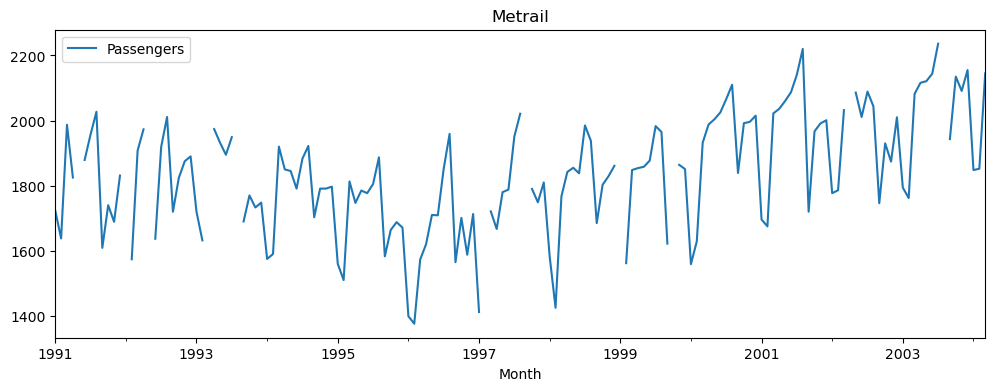

In [6]:
data.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Metrail')
plt.show(block=False)

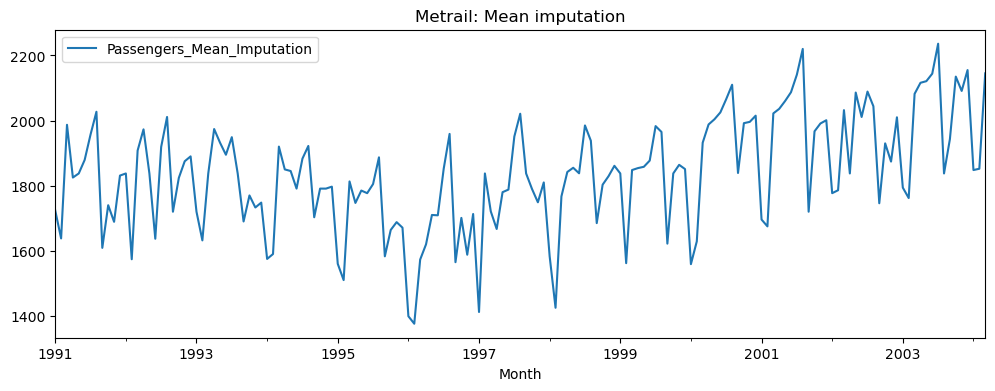

In [7]:
data = data.assign(Passengers_Mean_Imputation=data.Passengers.fillna(data.Passengers.mean()))
data[['Passengers_Mean_Imputation']].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Metrail: Mean imputation')
plt.show(block=False)



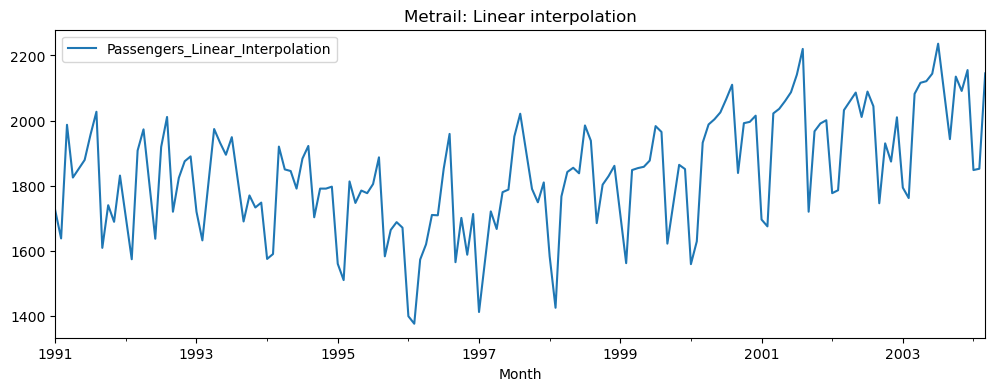

In [8]:
data = data.assign(Passengers_Linear_Interpolation=data.Passengers.interpolate(method='linear'))
data[['Passengers_Linear_Interpolation']].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Metrail: Linear interpolation')
plt.show(block=False)

In [9]:
data['Passengers_Linear_Interpolation'].mean()

1836.566037735849

In [10]:
data['Passengers'].mean()

1837.5472972972973

In [11]:
data.isnull().sum()

Passengers                         11
Passengers_Mean_Imputation          0
Passengers_Linear_Interpolation     0
dtype: int64

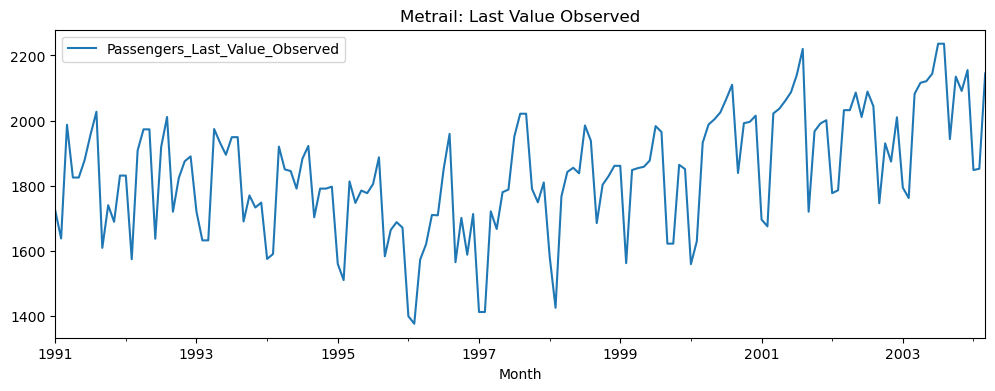

In [12]:
data = data.assign(Passengers_Last_Value_Observed=data.Passengers.fillna(method='pad'))
data[['Passengers_Last_Value_Observed']].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Metrail: Last Value Observed')
plt.show(block=False)

In [13]:
data['Passengers_Last_Value_Observed'].mean()

1838.685534591195

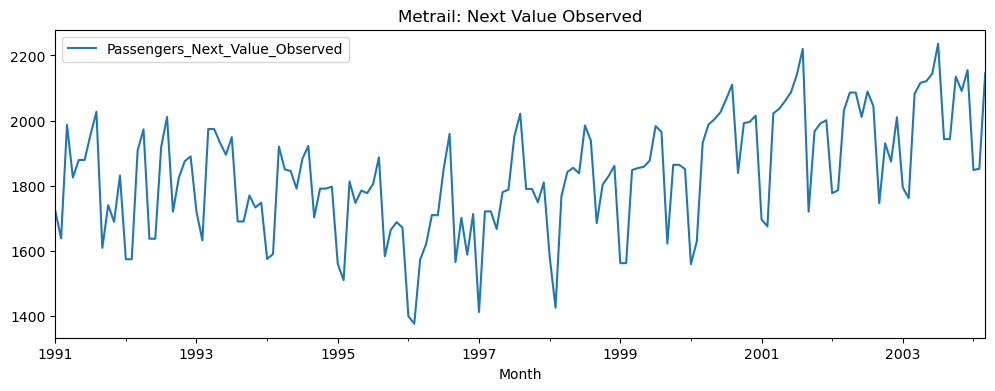

In [14]:
data = data.assign(Passengers_Next_Value_Observed=data.Passengers.fillna(method='bfill'))
data[['Passengers_Next_Value_Observed']].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Metrail: Next Value Observed')
plt.show(block=False)

In [15]:
data['Passengers_Next_Value_Observed'].mean()

1834.446540880503

In [16]:
data.head()

,Passengers,Passengers_Mean_Imputation,Passengers_Linear_Interpolation,Passengers_Last_Value_Observed,Passengers_Next_Value_Observed
Month,,,,,
1991-01-01,1724.0,1724.000000,1724.0,1724.0,1724.0
1991-02-01,1638.0,1638.000000,1638.0,1638.0,1638.0
1991-03-01,1987.0,1987.000000,1987.0,1987.0,1987.0
1991-04-01,1825.0,1825.000000,1825.0,1825.0,1825.0
1991-05-01,NaN,1837.547297,1852.0,1825.0,1879.0
